# Creating a Recommendation System for Movies

## Introduction 

Movies have always and still is a common form of entertainment, as well as, a common way people of all ages like to devote their downtime to. No matter what type of movie it is, the quality of the movie is important for individuals’ enjoyment and/or satisfaction. As a result, it is important that people do not waste time and/or money on a bad movie. Also, reviews are what is becoming more and more heavily relied on and more than ever accessible as they can be found within the touch of our fingers. Finding a way to suggest the best movies relative to the movies users of a website are searching up would make their lives much easier and waste less of their time. Therefore, our goal is to be able to suggest movies to those users on a movie rating website, such as Rotten Tomatoes, in order to make users feel satisfied and feel like the website is reliable to come back to for more movie recommendations and reviews in the future. We created a Recommendation System that will list a few good movies that a user may like based on the movie the user is currently looking at reviews for.

## About Our Dataset

The dataset our project is based on files that contain a metadata for all 45,000 available movies in the Full MovieLens Dataset, which is a dataset with movies that were released on or before July 2017 with 26 million ratings from 270,000 users for all 45,000 movie based on a 1 to 5 scale ratings/reviews. 

## Approaches and Methods

We accomplished our goal for the recommendation system through conducting an Exploratory Data Analysis to find common patterns and to explore variables individually along with its correlations. Then, we pre-processed our data to tidy it up a bit in order to conduct a Sentiment Analysis so that each review on the website could be given a score. We also used Non-negative Matrix Factorization with the help of wordclouds for topic modelling. 

### Exploratory Data Analysis 

We conducted exploratory data analysis through cleaning up the overview data and then applying it to some of the variables we included in the final model.

In [204]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

In [205]:
# import plotly
# import plotly.graph_objs as go

We first set the index of data to be movie titles. Looking at the given data, the variables genre, production countries, and production movies are in put in a json-like string. Then we use ast's library literal_eval() method to read the content of the cells for variables of production_companies, production_countries, and genre.

In [206]:
movie = pd.read_csv("movie_metadata_1.csv")
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25964 entries, 0 to 25963
Data columns (total 24 columns):
adult                    25964 non-null bool
belongs_to_collection    3743 non-null object
budget                   25964 non-null int64
genres                   25964 non-null object
homepage                 5423 non-null object
id                       25964 non-null int64
imdb_id                  25960 non-null object
original_language        25962 non-null object
original_title           25964 non-null object
overview                 25764 non-null object
popularity               25964 non-null float64
poster_path              25963 non-null object
production_companies     25964 non-null object
production_countries     25964 non-null object
release_date             25961 non-null object
revenue                  25964 non-null int64
runtime                  25942 non-null float64
spoken_languages         25964 non-null object
status                   25958 non-null object
tag

In [207]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 9648, 'name': 'Mystery'}, {'id': 12, 'name': 'Adventure'}]",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: ""inception"", the implantation of another person's idea into a target's subconsci...",...,7/14/2010,825532764,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,Inception,False,8.1,14075
1,False,"{'id': 263, 'name': 'The Dark Knight Collection', 'poster_path': '/bqS2lMgGkuodIXtDILFWTSWDDpa.jpg', 'backdrop_path': '/xfKot7lqaiW4XpL5TtDlVBA9ei9.jpg'}",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 53, 'name': 'Thriller'}]",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,"Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves pr...",...,7/16/2008,1004558444,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'zh', 'name': 'æ™®é€šè¯'}]",Released,Why So Serious?,The Dark Knight,False,8.3,12269
2,False,"{'id': 87096, 'name': 'Avatar Collection', 'poster_path': '/nslJVsO58Etqkk17oXMuVK4gNOF.jpg', 'backdrop_path': '/9s4BM48NweGFrIRE6haIul0YJ9f.jpg'}",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",...,12/10/2009,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'EspaÃ±ol'}]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114
3,False,"{'id': 86311, 'name': 'The Avengers Collection', 'poster_path': '/qJawKUQcIBha507UahUlX0keOT7.jpg', 'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'}",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,"When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recru...",...,4/25/2012,1519557910,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,The Avengers,False,7.4,12000
4,False,"{'id': 448150, 'name': 'Deadpool Collection', 'poster_path': '/30c5jO7YEXuF8KiWXLg9m28GWDA.jpg', 'backdrop_path': '/hBQOWY8qWXJVFAc8yLTh1teIu43.jpg'}",58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 35, 'name': 'Comedy'}]",http://www.foxmovies.com/movies/deadpool,293660,tt1431045,en,Deadpool,"Deadpool tells the origin story of former Special Forces operative turned mercenary Wade Wilson, who after being subjected to a rogue experiment that leaves him with accelerated healing powers, adopts the alter ego Deadpool. Armed with his new abilities and a dark, twisted se...",...,2/9/2016,783112979,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Witness the beginning of a happy ending,Deadpool,False,7.4,11444


In [208]:
movie.shape

(25964, 24)

In [209]:
movie = movie.set_index("title", drop = True)

In [210]:
movie.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,video,vote_average,vote_count
title,,,,,,,,,,,,,,,,,,,,,
Inception,False,NaN,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 9648, 'name': 'Mystery'}, {'id': 12, 'name': 'Adventure'}]",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: ""inception"", the implantation of another person's idea into a target's subconsci...",...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",7/14/2010,825532764,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,False,8.1,14075
The Dark Knight,False,"{'id': 263, 'name': 'The Dark Knight Collection', 'poster_path': '/bqS2lMgGkuodIXtDILFWTSWDDpa.jpg', 'backdrop_path': '/xfKot7lqaiW4XpL5TtDlVBA9ei9.jpg'}",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 53, 'name': 'Thriller'}]",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,"Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves pr...",...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",7/16/2008,1004558444,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'zh', 'name': 'æ™®é€šè¯'}]",Released,Why So Serious?,False,8.3,12269
Avatar,False,"{'id': 87096, 'name': 'Avatar Collection', 'poster_path': '/nslJVsO58Etqkk17oXMuVK4gNOF.jpg', 'backdrop_path': '/9s4BM48NweGFrIRE6haIul0YJ9f.jpg'}",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",...,"[{'iso_3166_1': 'US', 'name': 'United States of America'}, {'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",12/10/2009,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'EspaÃ±ol'}]",Released,Enter the World of Pandora.,False,7.2,12114
The Avengers,False,"{'id': 86311, 'name': 'The Avengers Collection', 'poster_path': '/qJawKUQcIBha507UahUlX0keOT7.jpg', 'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'}",220000000,"[{'id': 878, 'name': 'Science Fiction'}, {'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}]",http://marvel.com/avengers_movie/,24428,tt0848228,en,The Avengers,"When an unexpected enemy emerges and threatens global safety and security, Nick Fury, director of the international peacekeeping agency known as S.H.I.E.L.D., finds himself in need of a team to pull the world back from the brink of disaster. Spanning the globe, a daring recru...",...,"[{'iso_3166_1': 'US', 'name': 'United States of America'}]",4/25/2012,1519557910,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Some assembly required.,False,7.4,12000
Deadpool,False,"{'id': 448150, 'name': 'Deadpool Collection', 'poster_path': '/30c5jO7YEXuF8KiWXLg9m28GWDA.jpg', 'backdrop_path': '/hBQOWY8qWXJVFAc8yLTh1teIu43.jpg'}",58000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 35, 'name': 'Comedy'}]",http://www.foxmovies.com/movies/deadpool,293660,tt1431045,en,Deadpool,"Deadpool tells the origin story of 

In [211]:
movie['genres'] = movie['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie['production_countries'] = movie['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie['production_companies'] = movie['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [212]:
movie.isnull().sum()

adult                        0
belongs_to_collection    22221
budget                       0
genres                       0
homepage                 20541
id                           0
imdb_id                      4
original_language            2
original_title               0
overview                   200
popularity                   0
poster_path                  1
production_companies         0
production_countries         0
release_date                 3
revenue                      0
runtime                     22
spoken_languages             0
status                       6
tagline                  11298
video                        0
vote_average                 0
vote_count                   0
dtype: int64

Next, we created a heatmap to show the number of missing values in each variable. We got rid of variables belongs_to_collection, homepage, and tagline as they were made of mostly missing values, as well as variables that were not seem relevant to our study. 

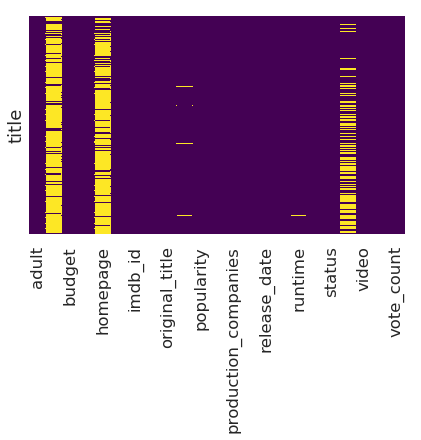

In [213]:
sns.heatmap(movie.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Since datasets often put 0 instead of NA for missing values, we checked to see if there is any 0 values for budget. A lot of zeros were found in both variables, and we replaced the zero values with NA to remove them in the budget variable only since released movies can not possibly have $0 in budget. 

In [214]:
# drop the columns that do not seem interesting or relevant 
movie_clean = movie.drop(['tagline', 'homepage','imdb_id', 'poster_path', 'original_title', 'overview', 'status', 'video', 'adult'], axis = 1)

In [215]:
# we want to see if there is any 0 values for budget and revenues 
movie_clean[movie_clean['budget'] == 0]['budget'].count()

18117

In [216]:
movie_clean[movie_clean['revenue'] == 0]['revenue'].count()

19014

In [217]:
# we should input NA values for revenues when both budget and revenue are 0 
# we should input NA values for budget when budget is 0
# but we are gonna leave the ones that have budget value but no revenue value

movie_clean.loc[(movie_clean['budget'] == 0) & (movie_clean['revenue'] == 0), 'revenue'] = np.nan
movie_clean.loc[movie_clean['budget'] == 0,'budget'] = np.nan

In [218]:
movie_clean.isnull().sum()

belongs_to_collection    22221
budget                   18117
genres                       0
id                           0
original_language            2
popularity                   0
production_companies         0
production_countries         0
release_date                 3
revenue                  16360
runtime                     22
spoken_languages             0
vote_average                 0
vote_count                   0
dtype: int64

In [219]:
movie_clean = movie_clean.dropna()

Next, we added column profit that was defined as: revenue - budget.

In [220]:
# we want to add a net profit column as well 
movie_clean['profit'] = movie_clean['revenue'] - movie_clean['budget']

In [221]:
#data with new profit column
movie_clean.head()

,belongs_to_collection,budget,genres,id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,profit
title,,,,,,,,,,,,,,,
The Dark Knight,"{'id': 263, 'name': 'The Dark Knight Collection', 'poster_path': '/bqS2lMgGkuodIXtDILFWTSWDDpa.jpg', 'backdrop_path': '/xfKot7lqaiW4XpL5TtDlVBA9ei9.jpg'}",185000000.0,"[Drama, Action, Crime, Thriller]",155,en,123.167259,"[DC Comics, Legendary Pictures, Warner Bros., DC Entertainment, Syncopy]","[United Kingdom, United States of America]",7/16/2008,1.004558e+09,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'zh', 'name': 'æ™®é€šè¯'}]",8.3,12269,8.195584e+08
Avatar,"{'id': 87096, 'name': 'Avatar Collection', 'poster_path': '/nslJVsO58Etqkk17oXMuVK4gNOF.jpg', 'backdrop_path': '/9s4BM48NweGFrIRE6haIul0YJ9f.jpg'}",237000000.0,"[Action, Adventure, Fantasy, Science Fiction]",19995,en,185.070892,"[Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]","[United States of America, United Kingdom]",12/10/2009,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'EspaÃ±ol'}]",7.2,12114,2.550965e+09
The Avengers,"{'id': 86311, 'name': 'The Avengers Collection', 'poster_path': '/qJawKUQcIBha507UahUlX0keOT7.jpg', 'backdrop_path': '/zuW6fOiusv4X9nnW3paHGfXcSll.jpg'}",220000000.0,"[Science Fiction, Action, Adventure]",24428,en,89.887648,"[Paramount Pictures, Marvel Studios]",[United States of America],4/25/2012,1.519558e+09,143.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.4,12000,1.299558e+09
Deadpool,"{'id': 448150, 'name': 'Deadpool Collection', 'poster_path': '/30c5jO7YEXuF8KiWXLg9m28GWDA.jpg', 'backdrop_path': '/hBQOWY8qWXJVFAc8yLTh1teIu43.jpg'}",58000000.0,"[Action, Adventure, Comedy]",293660,en,187.860492,"[Twentieth Century Fox Film Corporation, Marvel Entertainment, The Donners' Company, TSG Entertainment, Kinberg Genre]",[United States of America],2/9/2016,7.831130e+08,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.4,11444,7.251130e+08
Guardians of the Galaxy,"{'id': 284433, 'name': 'Guardians of the Galaxy Collection', 'poster_path': '/iL8mukexAqEg0xK783rG561tdd8.jpg', 'backdrop_path': '/jdyyjulTBU8YUYAUvQFj6U1g2Pj.jpg'}",170000000.0,"[Action, Science Fiction, Adventure]",118340,en,53.291601,"[Marvel Studios, Moving Picture Company (MPC), Bulletproof Cupid, Revolution Sun Studios]","[United Kingdom, United States of America]",7/30/2014,7.733286e+08,121.0,"[{'iso_639_1': 'en', 'name': 'English'}]",7.9,10014,6.033286e+08


We produced another heatmap to see the correlation between all the current variables.

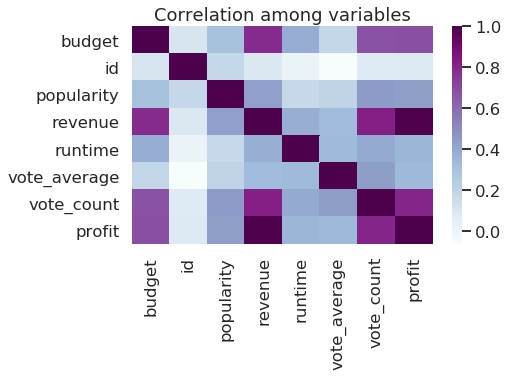

In [222]:
ax = plt.axes()
sns.heatmap(movie_clean.corr(), cmap = 'BuPu')
ax.set_title('Correlation among variables')
plt.show()

As we can see, budget, revenue and vote_count are heavily correlated with a correlation of about 0.8. This makes sense, because usually movies with larger budget end up with a bigger revenue. The explanation to this is that those movies gets a lot of publicity such as through ads and commercials. Vote_count is also relatively big since more publicity means more people have watched it. However, we must note that rating is not heavily correlated with budget or revenue. This is due to the fact that the popularity of the movie does not have anything to do with the actual quality of it. Lastly, we can see that profit and revenue are very highly related since profit almost the same thing as revenue.

Then we created a function called counting_values that counts the number of times categorical values appear in the selected columns in order to visualize the frequency of a specific variable in certain movies.

In [223]:
def counting_values(df, column):
    value_count = {}
    for row in df[column].dropna():
        if len(row) > 0:
            for key in row:
                if key in value_count:
                    value_count[key] += 1
                else:
                    value_count[key] = 1
        else:
            pass
    return value_count

In [224]:
genre = pd.Series(counting_values(movie_clean, 'genres'))
country = pd.Series(counting_values(movie_clean, 'production_countries'))
company = pd.Series(counting_values(movie_clean, 'production_companies'))

We use the counting_values function on variables genre, production_country, and production_company.

In [225]:
genre_top15 = genre.sort_values(ascending = False).head(15)

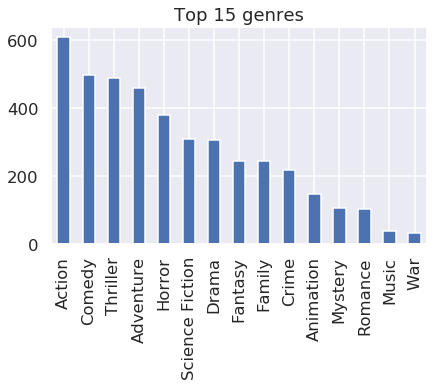

In [226]:
#plot for top genres
ax = plt.axes()
genre_top15.plot(kind = 'bar')
ax.set_title('Top 15 genres')
plt.show()

In [227]:
genre_top15

Action             610
Comedy             498
Thriller           488
Adventure          460
Horror             381
Science Fiction    308
Drama              305
Fantasy            244
Family             243
Crime              219
Animation          148
Mystery            105
Romance            103
Music               39
War                 31
dtype: int64

Action wins top genre by a relatively large margin, and then comedy and thriller follow close by.

In [228]:
company_top15 = company.sort_values(ascending = False).head(15)

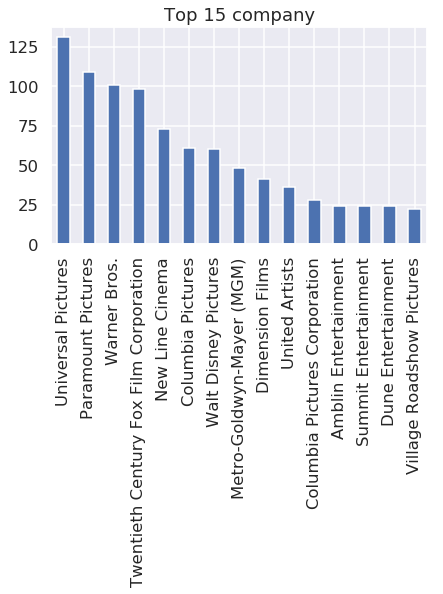

In [229]:
#plot for top companies that produced movies
ax = plt.axes()
company_top15.plot(kind = 'bar')
ax.set_title('Top 15 company')
plt.show()

There is a gradual decrease in productions by company with Universal Pictures being highest.

In [230]:
country.head()

United Kingdom               170
United States of America    1281
Australia                     32
China                         26
New Zealand                    8
dtype: int64

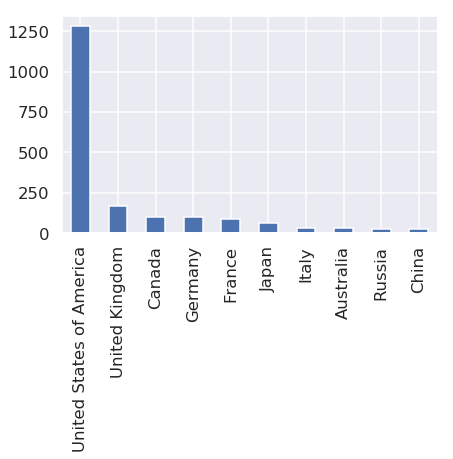

In [231]:
#plot for top countries that released movies
country.sort_values(ascending = False).head(10).plot(kind = 'bar')

USA wins by a huge gap in most movies produced by country.

## Text Mining

Here, we will combine what we find from Non-negative Matrix Factorization with Sentiment Analysis to give each review a number rating in order to know which similar movies are best to recommend to those users for our recommendation system.

### Pre-processing Overview Data 

We restructured the whole dataset, such as through changing the data type to either double or list. Then we dropped all missing data, and created an overview dataset that only contains columns overview and original movie name to use for making the recommendation system. To prevent the kernal from crashing due to too much data, we chose 2000 observations from the overview dataset. We then pre-processed the overview data, changed all the text into lowercase, as well as, removed punctuation and stopwords. 

In [232]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from scipy import stats
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
#from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
#from nltk.stem.snowball import SnowballStemmer
#from nltk.stem.wordnet import WordNetLemmatizer
#from nltk.corpus import wordnet

import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
#from wordcloud import WordCloud
#from textblob import TextBlob
#from textblob import Word
from nltk.stem import PorterStemmer
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [233]:
import pandas as pd ## call pandas functions using "pd"
import numpy as np  ## call numpy functions using "np"
movie = pd.read_csv("movie_metadata_1.csv")
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25964 entries, 0 to 25963
Data columns (total 24 columns):
adult                    25964 non-null bool
belongs_to_collection    3743 non-null object
budget                   25964 non-null int64
genres                   25964 non-null object
homepage                 5423 non-null object
id                       25964 non-null int64
imdb_id                  25960 non-null object
original_language        25962 non-null object
original_title           25964 non-null object
overview                 25764 non-null object
popularity               25964 non-null float64
poster_path              25963 non-null object
production_companies     25964 non-null object
production_countries     25964 non-null object
release_date             25961 non-null object
revenue                  25964 non-null int64
runtime                  25942 non-null float64
spoken_languages         25964 non-null object
status                   25958 non-null object
tag

In [234]:
movie.iloc[0:3]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,NaN,160000000,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 9648, 'name': 'Mystery'}, {'id': 12, 'name': 'Adventure'}]",http://inceptionmovie.warnerbros.com/,27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: ""inception"", the implantation of another person's idea into a target's subconsci...",...,7/14/2010,825532764,148.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Your mind is the scene of the crime.,Inception,False,8.1,14075
1,False,"{'id': 263, 'name': 'The Dark Knight Collection', 'poster_path': '/bqS2lMgGkuodIXtDILFWTSWDDpa.jpg', 'backdrop_path': '/xfKot7lqaiW4XpL5TtDlVBA9ei9.jpg'}",185000000,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 53, 'name': 'Thriller'}]",http://thedarkknight.warnerbros.com/dvdsite/,155,tt0468569,en,The Dark Knight,"Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves pr...",...,7/16/2008,1004558444,152.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'zh', 'name': 'æ™®é€šè¯'}]",Released,Why So Serious?,The Dark Knight,False,8.3,12269
2,False,"{'id': 87096, 'name': 'Avatar Collection', 'poster_path': '/nslJVsO58Etqkk17oXMuVK4gNOF.jpg', 'backdrop_path': '/9s4BM48NweGFrIRE6haIul0YJ9f.jpg'}",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 878, 'name': 'Science Fiction'}]",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",...,12/10/2009,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'EspaÃ±ol'}]",Released,Enter the World of Pandora.,Avatar,False,7.2,12114


In [235]:
movie['genres'] = movie['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie['production_countries'] = movie['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
movie['production_companies'] = movie['production_companies'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [236]:
movie.iloc[0:3].production_companies

0                                                                        [Legendary Pictures, Warner Bros., Syncopy]
1                                           [DC Comics, Legendary Pictures, Warner Bros., DC Entertainment, Syncopy]
2    [Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]
Name: production_companies, dtype: object

In [237]:
#variables that we have in the dataset so far
list(movie.columns.values)

['adult',
 'belongs_to_collection',
 'budget',
 'genres',
 'homepage',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'poster_path',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'video',
 'vote_average',
 'vote_count']

In [238]:
movie_sub=movie[['adult',
 'budget',
 'genres',
 'id',
 'imdb_id',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'status',
 'title',
 'video',
 'vote_average',
 'vote_count']]

In [239]:
movie_sub.iloc[0:3]

,adult,budget,genres,id,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,status,title,video,vote_average,vote_count
0,False,160000000,"[Action, Thriller, Science Fiction, Mystery, Adventure]",27205,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: ""inception"", the implantation of another person's idea into a target's subconsci...",29.108149,"[Legendary Pictures, Warner Bros., Syncopy]","[United Kingdom, United States of America]",7/14/2010,825532764,148.0,Released,Inception,False,8.1,14075
1,False,185000000,"[Drama, Action, Crime, Thriller]",155,tt0468569,en,The Dark Knight,"Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves pr...",123.167259,"[DC Comics, Legendary Pictures, Warner Bros., DC Entertainment, Syncopy]","[United Kingdom, United States of America]",7/16/2008,1004558444,152.0,Released,The Dark Knight,False,8.3,12269
2,False,237000000,"[Action, Adventure, Fantasy, Science Fiction]",19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.",185.070892,"[Ingenious Film Partners, Twentieth Century Fox Film Corporation, Dune Entertainment, Lightstorm Entertainment]","[United States of America, United Kingdom]",12/10/2009,2787965087,162.0,Released,Avatar,False,7.2,12114


In [240]:
#remove missing value
movie_1=movie_sub.dropna()
len(movie_1)

25751

In [241]:
#begin creating our recommendation system based on the first 2000 observations 
movie_overview=movie_1.iloc[0:2000,:][["original_title","overview"]]

In [242]:
# use natural language process package
import nltk
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

#instaLL wordcloud using pip install wordcloud
from wordcloud import WordCloud

In [243]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [244]:
movie_overview.iloc[0:3]

,original_title,overview
0,Inception,"Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: ""inception"", the implantation of another person's idea into a target's subconsci..."
1,The Dark Knight,"Batman raises the stakes in his war on crime. With the help of Lt. Jim Gordon and District Attorney Harvey Dent, Batman sets out to dismantle the remaining criminal organizations that plague the streets. The partnership proves to be effective, but they soon find themselves pr..."
2,Avatar,"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization."


In [245]:
#Lowercase:
movie_overview['overview'] = movie_overview['overview'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [246]:
# Removing punctuation
movie_overview['overview'] = movie_overview['overview'].str.replace('[^\w\s]','')

In [247]:
#remove stopwords
stop_nltk = list(stop_words.ENGLISH_STOP_WORDS)
movie_overview['overview'] = movie_overview['overview'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_nltk))

In [248]:
movie_overview["overview"][0]

'cobb skilled thief commits corporate espionage infiltrating subconscious targets offered chance regain old life payment task considered impossible inception implantation persons idea targets subconscious'

### WordCloud

After preprocessing, we created wordcloud to visualize the high frequency words in overview, that way we can spot the important topics easier. These high frequency words that appear large helped a lot with our cleaned data. From this WordCloud, we can see how words conveys a lot of important information about the movie that way we know that the data is well structured for future analysis. 

In [249]:
movie_overview["overview"].to_csv('overview_clean.txt', index=False, sep=' ', header=None)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [250]:
f = open('overview_clean.txt','r',encoding='utf-8').read()
word_tokens = word_tokenize(f) 
wl_space_split = " ".join(word_tokens)

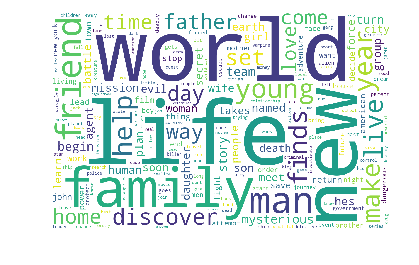

In [251]:
#create wordcloud
overview_wc = WordCloud(
        background_color="white",
        width=1500,             
        height=960,              
        margin=10               
        ).generate(wl_space_split)
plt.figure()
plt.imshow(overview_wc)
plt.axis("off")
plt.show()
overview_wc.to_file('overview_wc.png')

### NMF 

Here, we only used Non-negative Matrix Factorization on the cleaned data for topic modelling. This way we can find clear patterns and structures in topic. First, we use TF-IDF method to convert our cleaned overview into words and then we run NMF to get important topics. We extracted 10 topics as shown, and the topics extracted are easily recognizable, such as topic 2 being about war. 

In [252]:
# Create a function to display topics in a clear manner
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
no_features = 1000
no_topics = 5
no_top_words = 10

## code found in https://gist.github.com/aneesha/a54e7e182ddf564f6a5c1fe50db556a2

In [253]:
# TFIDF for NMF (EXPERIMENATION)

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=10)
tfidf_nmf = tfidf_vectorizer.fit_transform(movie_overview["overview"])


import sklearn.decomposition as skld
model = skld.NMF(n_components=10, init='nndsvda', max_iter=500, random_state=0)
# NMF algorithm (EXPERIMENATION)
nmf = model.fit_transform(tfidf_nmf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [254]:
#show the topics extracted 
display_topics(model, tfidf_feature_names, no_top_words)

Topic 1:
life way meets live changes decides son love discovers turned
Topic 2:
world war ii forces known set japanese film mysterious takes
Topic 3:
story love true based falls film tells american century tale
Topic 4:
family home child parents son father children protect house childhood
Topic 5:
new york city years gets eve start lives alice big
Topic 6:
young woman father boy finds named help mysterious daughter home
Topic 7:
agent fbi police cop hes detective drug case undercover murder
Topic 8:
friends school high best day girl night friend party just
Topic 9:
man woman alter takes years wife murder powerful days revenge
Topic 10:
team earth mission planet alien crew evil group battle stop


Through the TF-IDF and NMF process, we can get two matrices. One matrix is constructed as sentence by words and the other is constructed as words by topics. By combining these two matrices, we get a matrix of topics by sentence.  Next, we substitute the sentence with corresponding movie name to create a chart that includes the correlations between the extracted 10 topics from above and all the 2000 movies in the overview dataset. Shown below is a the chart of 8 random movies with the distribution for each topic. Looking into each column, we can see that some movies have strong correlation with a specific topic, while some have multiple correlated topics. For instance, the movie “Inception” is more about topic 1 than the other 9 topics. 


In [255]:
W=np.matrix(tfidf_nmf.toarray())
H=np.matrix(model.components_.T)

In [256]:
W.shape 
#W is constructed as 2000 preprocessed overviews and 1042 extracted words through tf-idf 

(2000, 1042)

In [ ]:
H.shape 
#H is constructed as 1042 words by the ten topics extracted using NMF methods

(1042, 10)

In [ ]:
X_hat=W@H 
# getting the topics and moview overviews' matrix by 

In [ ]:
X=X_hat.T

In [ ]:
X.shape

(10, 2000)

In [ ]:
shot_type_names = ['topic'+ str(i) for i in range(1,11)]
Xnew = pd.DataFrame(X)
Xnew.index = shot_type_names
Xnew.columns = list(movie_overview["original_title"])
X
Xnew

,Inception,The Dark Knight,Avatar,The Avengers,Deadpool,Interstellar,Django Unchained,Guardians of the Galaxy,Fight Club,The Hunger Games,...,G-Force,Cop Out,WarGames,The Kingdom,Lars and the Real Girl,Hereafter,The Lazarus Effect,Skyline,The Hundred-Foot Journey,Citizenfour
topic1,0.612448,0.042924,0.018032,0.077441,0.529834,0.084915,0.081320,0.137218,0.205003,0.469914,...,0.001703,0.137006,0.036127,0.013992,0.225530,0.128470,0.179360,0.147513,0.020972,0.083145
topic2,0.004585,0.199786,0.020211,0.262049,0.056793,0.052821,0.028338,0.024136,0.021670,0.232318,...,0.513841,0.022195,0.116981,0.035072,0.026278,0.048121,0.030591,0.289130,0.027543,0.029860
topic3,0.035467,0.018050,0.066131,0.051201,0.263146,0.010262,0.025095,0.081968,0.003239,0.143525,...,0.009262,0.039335,0.064661,0.070588,0.708203,0.158810,0.044991,0.023737,0.368319,0.135471
topic4,0.017615,0.025084,0.021302,0.043743,0.035347,0.043881,0.040514,0.046834,0.015717,0.150925,...,0.033236,0.023991,0.014202,0.015517,0.038770,0.054269,0.054061,0.057046,0.360400,0.039223
topic5,0.020217,0.079196,0.011215,0.065399,0.247514,0.009191,0.017150,0.080693,0.452649,0.045245,...,0.037279,0.050352,0.038890,0.020755,0.044932,0.018885,0.049907,0.212603,0.036357,0.054024
topic6,0.019936,0.093041,0.000000,0.069694,0.029778,0.049061,0.095103,0.070432,0.046528,0.105504,...,0.063369,0.031895,0.025146,0.027650,0.148620,0.128292,0.065137,0.066741,0.034812,0.050527
topic7,0.093764,0.231517,0.026149,0.095833,0.082446,0.067350,0.225393,0.044588,0.053345,0.080437,...,0.303692,0.185127,0.121861,0.152893,0.106320,0.061806,0.143967,0.146342,0.037268,0.079603
topic8,0.031540,0.051542,0.002466,0.053284,0.054366,0.131187,0.070909,0.095610,0.104401,0.153728,...,0.051919,0.153307,0.272633,0.037096,0.275108,0.187644,0.076169,0.081226,0.025893,0.070683
topic9,0.003956,0.040556,0.032107,0.017499,0.355090,0.059011,0.077741,0.092311,0.048138,0.039518,...,0.032795,0.048999,0.011213,0.019290,0.059902,0.069546,0.036485,0.038539,0.009540,0.068650
topic10,0.043164,0.071058,0.332600,0.268253,0.096696,0.223583,0.069556,0.305406,0.178535,0.212283,...,0.569795,0.117895,0.170158,0.318459,0.084112,0.111128,0.288823,0.388282,0.009983,0.055888


We created a heatmap and chart to visually show the correlation between movies to visually see which movies are more or less correlated with other movies from the 2000 movie in our data. Red means those movies are highly correlated, while blue means those movies are less correlated.

In [ ]:
#visualization parts of correlations between movies
#because the whole dataset has 25751 movies,which will cause the kernal to die
Xnew_part=Xnew.iloc[:,0:500]
topic_movie_corr = Xnew_part.corr()
plt.figure(figsize=(18,18))
ax = sns.heatmap(topic_movie_corr, square=True, cmap="coolwarm")

The former heatmap does not show clear pattern of correlations between each movies. Therefore, we create a clearer heatmap that joints correlated movies together and from this map we can see that the first 7th to 12th movie in the y-axis are similar to each other.

In [ ]:
from scipy.cluster.hierarchy import linkage, leaves_list
Xnew_linkage = linkage(Xnew_part.transpose(), optimal_ordering=True)
leave_ord = leaves_list(Xnew_linkage)
plt.figure(figsize=(18,18))
sns.heatmap(topic_movie_corr.iloc[leave_ord, leave_ord], square=True, cmap="coolwarm")

In [ ]:
topic_movie_corr

Next, we found similar movies by finding the most correlated movies. For instance, “The Gambler”, ”Casino”, and ”Yes Man” are movies that are very similar to “Inception” as proven through the high correlation number.

In [ ]:
allcorr = Xnew.corr()
inception_s = allcorr[allcorr['Inception'] > 0.99]['Inception'].sort_values(ascending=False)
inception_s

This is a visualization of the correlation between the 10 topics discussed above and the five most similar movies to inception that was just found. We can see a clear pattern that these 5 movies are highly correlated with topic 1 while has some correlation with topic 7.

In [ ]:
vec_normalize = lambda x : x/sum(x)
Xnorm = Xnew.apply(vec_normalize)
vec_entropy = lambda x: sum(x*np.log(x + 0.00000001))*-1 
entropy =  Xnorm.apply(vec_entropy,axis=0)

In [ ]:
#plot five similar movies with the shape of correspongding topics
def plot_similar(df,like_list):
    x = list(df.index)
    color = ['blue', 'red', 'green', 'purple', 'orange']
    plt.grid()
    for i in range(df[like_list].shape[1]):
        y = df[like_list].iloc[:,i]
        plt.plot(x,y,color = color[i])
        plt.legend()
        plt.xlabel('Topics')
        plt.ylabel('Movies overviews')
    return    

figure = plt.figure(figsize=(20,5))

## Plot for inception-like movies
inception_similarity = list(allcorr[allcorr['Inception'] > 0.99]['Inception'].sort_values(ascending=False).index)[0:5]

plot_similar(Xnorm,inception_similarity)
plt.title('inception-like movies')

### Sentiment Analysis 

Lastly, we randomly scraped 25 reviews from each of the 5 movies from the IMDB website based on how similar they are, totalling 125 reviews. We conducted sentiment analysis for each of the 125 reviews in order to assign a grade for each review. -1 is the most negative review and 1 is the most positive review. For instance, the image shown below are the last 5 reviews of 125 reviews with its assigned grade.

In [ ]:
from pandas import DataFrame
import pandas as pd
# # df = DataFrame.from_csv("reviews.tsv", sep="\t")
import scipy as sp
# data = sp.genfromtxt("reviews.tsv", delimiter="\t")

# Run this cell to set up your notebook
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import zipfile

# Ensure that Pandas shows at least 280 characters in columns, so we can see full tweets
pd.set_option('max_colwidth', 280)

%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set()
sns.set_context("talk")
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
#getting the reviews
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

urlall=["https://www.imdb.com/title/tt1375666/reviews?ref_=tt_urv","https://www.imdb.com/title/tt2039393/reviews?ref_=tt_urv","https://www.imdb.com/title/tt0112641/reviews?ref_=tt_ql_3","https://www.imdb.com/title/tt1068680/reviews?ref_=tt_ql_3","https://www.imdb.com/title/tt0084726/reviews?ref_=tt_ql_3"]
reviewall=[]
for i in urlall:
    url=i
    res = requests.get(url)
    soup = BeautifulSoup(res.text,"lxml")

    main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])  ##extracting the link leading to the page containing everything available here
    response = requests.get(main_content)
    broth = BeautifulSoup(response.text,"lxml")
    #reviewall=[]
    for item in broth.select(".review-container"):
        title = item.select(".title")[0].text
        reviewweb = item.select(".text")[0].text
        reviewall.append(reviewweb)

In [ ]:
reviewalldata=pd.DataFrame(reviewall)
reviewalldata=reviewalldata.rename(index=str, columns={0: "review"})
reviewalldata['id']= range(1, len(reviewalldata) + 1)
len(reviewalldata)

In [ ]:
reviewalldata['review']=reviewalldata['review'].str.lower()
punct_re = r'[^\w\s]'
reviewalldata['no_punc'] =reviewalldata['review'].str.replace(punct_re,' ')
! wget -nc -nv https://raw.githubusercontent.com/dipanjanS/text-analytics-with-python/master/Old-First-Edition/source_code/Ch04_Text_Classification/contractions.py
from contractions import CONTRACTION_MAP
CONTRACTION_MAP

In [ ]:
#text preprocessing
def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        # not sure why below is there
        # expanded_contraction = first_char+expanded_contraction[1:] 
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [ ]:
#add a column of the text
reviewalldata['no_punc'] = [expand_contractions(sentence, CONTRACTION_MAP) for sentence in reviewalldata['no_punc']]
reviewalldata.tail()

In [ ]:
total=[]
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
for sentence in reviewalldata['no_punc']:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    total.append(ss)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print('\n')

In [ ]:
#compound the sentiment into a column
polarity=pd.DataFrame(total)

# search_info.head()
reviewalldata['polarity']=list(polarity['compound'])

In [ ]:
#chart with grade assigned to every review
reviewalldata=reviewalldata.drop(columns=['review'])
reviewalldata.tail()

In [ ]:
reviewalldata.head()
#for review in reviewalldata['no_punc']:
grade=[]
a=list(polarity['compound'])
for i in range(5):
    grade.append(sum(a[25*i:(25*(i+1)-1)])/25)
grade

We proceed to average out all the polarity grades of reviews for a certain movie, making up the numbers seen in the review_grades column. We used this variable to determine how good a movie is based on viewers’ opinions, and we will recommend the similar movies in the order of from highest to lowest review grade.

In [ ]:
a= {"similar_movies":inception_similarity,"review_grades":grade}
mrg=pd.DataFrame(data=a)
mrg.sort_values(by="review_grades",ascending=False)

## Results  

With the approaches and methods that we used as mentioned above, we accomplished our goal for the recommendation system. That is to mark the top three movies based on the strongest correlation with the topics found in the current movie and the best average review/rating, and then setting them as possible movie recommendations that the user may enjoy.

### EDA 

As seen in the last 3 bar plots of EDA, more action movies were made than any other genre from 1985 up till 2017. This was followed by comedy in second and thriller in third place. It is also shown that Universal Pictures produced more movies than any other company throughout those year. Lastly, USA has produced more movies than any other country in the dataset by a huge margin. A possible reason for this is that USA has an established culture of exporting a lot of its entertainment to other countries, whereas most of the other countries around the world do not.

In [ ]:
#3 plots

#top 15 for genre
genre_top15 = genre.sort_values(ascending = False).head(15)
ax = plt.axes()
genre_top15.plot(kind = 'bar')
ax.set_title('Top 15 genres')
plt.show()

In [ ]:
#top 15 companies 
company_top15 = company.sort_values(ascending = False).head(15)
ax = plt.axes()
company_top15.plot(kind = 'bar')
ax.set_title('Top 15 company')
plt.show()

In [ ]:
#top 15 countries
country.sort_values(ascending = False).head(10).plot(kind = 'bar')

### Text Mining 

Continuing from the last chart found in Sentiment Analysis, we can see that all 5 movies have positive reviews and amongst all of these, “Yes Man”, “Casino”, and “The Gambler” have the highest grade. Therefore, we will recommend these 3 movies for someone who is looking up reviews for “Inception” as they are the most positively rated movies amongst all 2000 movies that are most highly correlated with the “Inception” movie based on this dataset.

In [ ]:
#print chart again
a= {"similar_movies":inception_similarity,"review_grades":grade}
mrg=pd.DataFrame(data=a)
mrg.sort_values(by="review_grades",ascending=False)

## Possible Improvements/Future Directions 

In this project, we only used NMF to extract topics, so we can try with LDA in the future. We also don't have all the reviews for all movies and it took a while to get the reviews. Therefore, we will try to find a more efficient way to get the data next time. Lastly, we only took 2000 observations, so we will take all the observations from the data next time we work with this dataset in order to also see if any of the patterns and correlations we observed remain the same. Also, this is only based on movie trends from 1985-2016, and trends do change. Thus, we would like to create a model that can predict what the next big movie trends are as we continue collecting new data about movies. 

## Conclusion 

In conclusion, we found that more action movies were produced than any other genre from years 1985 up till 2017 from our EDA. Universal Pictures also produced more movies than any other company throughout those years. In addition, USA has produced more movies than any other country in the dataset by a huge margin. A possible reason for this is that USA has an established culture of exporting a lot of its entertainment to other countries, whereas most of the other countries around the world do not. Based on all these observed patterns, we know what direction to take our recommendation system and what to recommend to people looking for good movies in general. 

Furthermore, budget, revenue and vote_count are observed to be heavily correlated with a correlation of about 0.8. This makes sense, because usually movies with larger budget end up with a bigger revenue. In other words, those movies gets a lot of publicity such as through ads and commercials. As a result, the movie reaches out to more people and therefore more watch the movie, making Vote_count's correlation relatively high. However, we found that rating is not heavily correlated with budget or revenue. This is because a popular movie does not necessarily mean that the movie was good and vice versa.

Lastly, we were able to build a recommendation system base on our raw data set and the reviews from IMDB websites. We  did so through text mining on movie overviews to extract 10 topics using NMF method. Then we found correlations between each movies and using the correlation to find similar movies. With sentiment analysis, we received reviews of those similar movies to get a recommendation in the order from most to least similar movies.

## References 

https://www.kaggle.com/rounakbanik/the-movies-dataset#movies_metadata.csv
https://www.imdb.com/
https://www.dataquest.io/blog/web-scraping-beautifulsoup/